COVID-19

In [120]:
import pandas as pd

In [127]:
# Загружаем данные о заболевших, умерших и выздоровевших
covid_data = pd.read_csv(r"C:/Users/dmikh/OneDrive - Gamma International Group/IDE/Data/Covid-19/covid_19_data.csv")
display(covid_data.head())

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [128]:
# Загружаем данные о вакцинации
vaccinations_data = pd.read_csv(r"C:/Users/dmikh/OneDrive - Gamma International Group/IDE/Data/Covid-19/country_vaccinations.csv")
display(vaccinations_data.head())

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [132]:
# Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по каждому регионам
covid_data = covid_data.groupby(
    ['ObservationDate', 'Country/Region'], 
    as_index=False
)[['Confirmed', 'Deaths', 'Recovered']].sum()
display(covid_data.head())

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,01/01/2021,Afghanistan,51526.0,2191.0,41727.0
1,01/01/2021,Albania,58316.0,1181.0,33634.0
2,01/01/2021,Algeria,99897.0,2762.0,67395.0
3,01/01/2021,Andorra,8117.0,84.0,7463.0
4,01/01/2021,Angola,17568.0,405.0,11146.0


In [138]:
# Преобразуем даты в формат datetime
covid_data['ObservationDate'] = pd.to_datetime(covid_data['ObservationDate'])
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [134]:
# Создадим признак больных на данный момент (active)
covid_data['Active'] = covid_data['Confirmed'] - covid_data['Deaths'] - covid_data['Recovered']

In [135]:
# Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей
covid_data = covid_data.sort_values(by=['Country/Region', 'ObservationDate'])
covid_data['Daily_confirmed'] = covid_data.groupby('Country/Region')['Confirmed'].diff()
covid_data['Daily_deaths'] = covid_data.groupby('Country/Region')['Deaths'].diff()
covid_data['Daily_recovered'] = covid_data.groupby('Country/Region')['Recovered'].diff()

In [137]:
covid_data.head(20)

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Active,Daily_confirmed,Daily_deaths,Daily_recovered
12394,2020-02-28,Azerbaijan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
15308,2020-03-10,"('St. Martin',)",2.0,0.0,0.0,2.0,NaN,NaN,NaN
11424,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11659,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11898,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12144,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12395,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12652,2020-02-29,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12717,2020-03-01,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12982,2020-03-02,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [140]:
# За какой период представлены данные в таблице covid_data?
print(covid_data['ObservationDate'].min())
print(covid_data['ObservationDate'].max())

2020-01-22 00:00:00
2021-05-29 00:00:00


In [141]:
# За какой период представлены данные в таблице vaccinations_data?
print(vaccinations_data['date'].min())
print(vaccinations_data['date'].max())

2020-12-02 00:00:00
2022-03-29 00:00:00


In [191]:
vaccinations_data.loc[vaccinations_data["country"] == "United States", "country"] = 'US'

In [192]:
# С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам date и country
# В результирующую таблицу должны попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data
covid_df = covid_data.merge(vaccinations_data, how='left', left_on=['ObservationDate','Country/Region'], right_on=['date','country'])

In [193]:
# В получившейся таблице covid_df создайте признаки death_rate и recover_rate
covid_df['death_rate'] = (covid_df['Deaths'] / covid_df['Confirmed']) * 100
covid_df['recover_rate'] = (covid_df['Recovered'] / covid_df['Confirmed']) * 100

In [169]:
# Какова максимальная летальность в США (United States) за весь период?
covid_df[covid_df['Country/Region'] == 'US'].groupby('Country/Region')['death_rate'].max()

Country/Region
US    7.189542
Name: death_rate, dtype: float64

In [172]:
# Чему равен средний процент выздоровевших в России (Russia)?
covid_df[covid_df['Country/Region'] == 'Russia'].groupby('Country/Region')['recover_rate'].mean()

Country/Region
Russia    67.062735
Name: recover_rate, dtype: float64

<AxesSubplot: title={'center': 'Ежедневная заболеваемость во времени'}, xlabel='ObservationDate'>

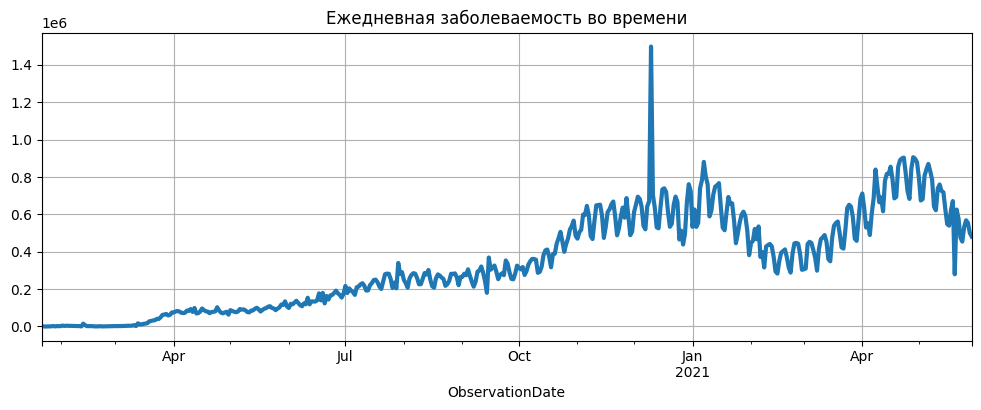

In [174]:
# Строим линейный график общей ежедневной заболеваемости во времени
grouped_cases = covid_df.groupby('ObservationDate')['Daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
)

<AxesSubplot: title={'center': 'Распределение ежедневной заболеваемости'}, ylabel='Frequency'>

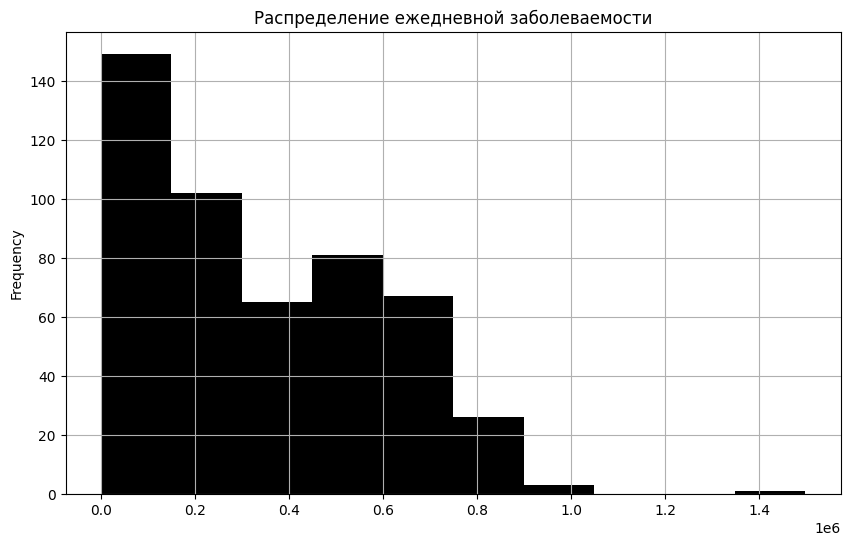

In [175]:
# Построим гистограмму, которая покажет распределение ежедневной заболеваемости во всём мире
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
)

<AxesSubplot: xlabel='Country/Region'>

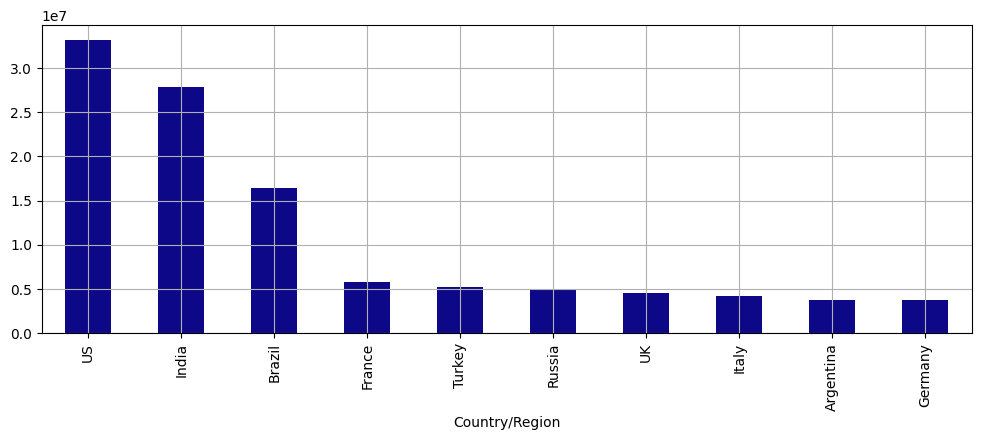

In [176]:
# Построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости
grouped_country = covid_df.groupby(['Country/Region'])['Confirmed'].last() # определяем последнее значение Confirmed для каждой страны
grouped_country = grouped_country.nlargest(10) # отсекаем топ-10
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
)

<AxesSubplot: xlabel='Country/Region'>

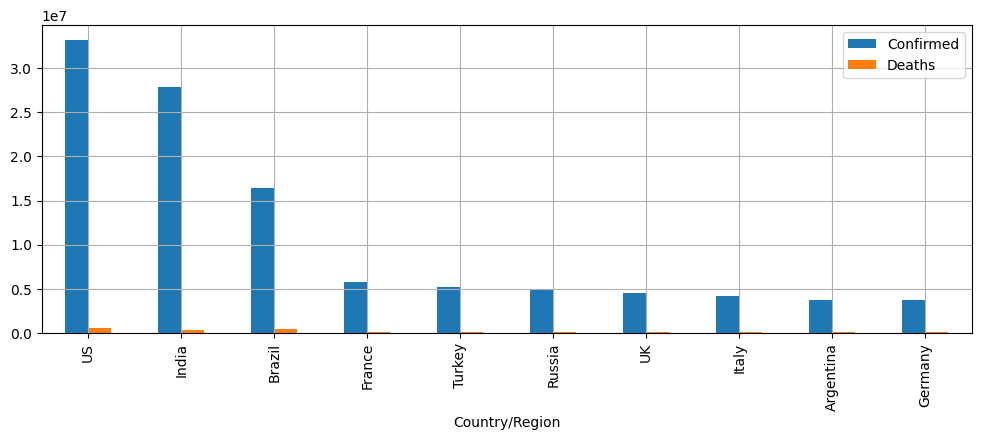

In [177]:
# А теперь посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса.
grouped_country = covid_df.groupby(['Country/Region'])[['Confirmed', 'Deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['Confirmed'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4),
)

<AxesSubplot: xlabel='Country/Region'>

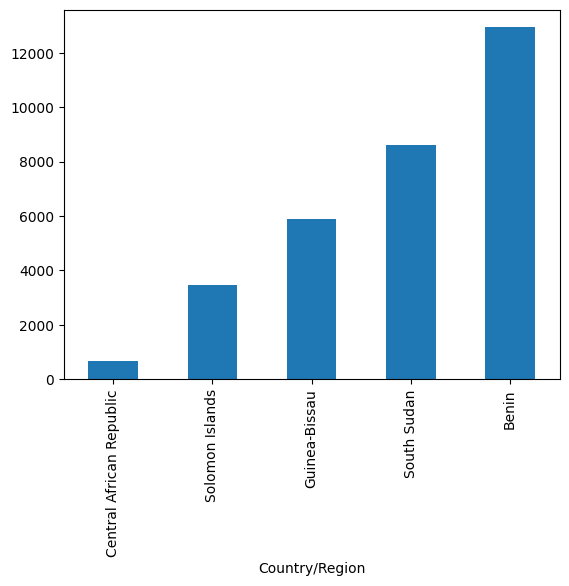

In [178]:
# В какой стране число вакцинированных наименьшее?
covid_df.groupby(['Country/Region'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar')

In [180]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

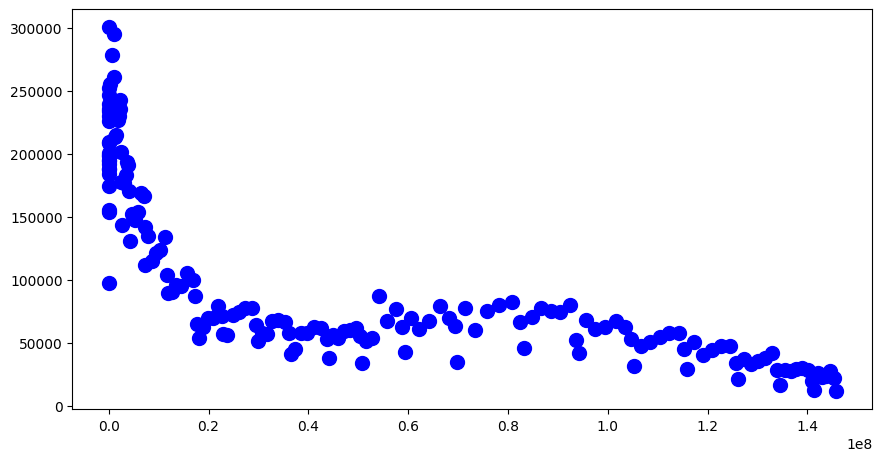

In [195]:
# Построим диаграмму рассеяния, которая покажет зависимость числа ежедневно обнаруживаемых случаев заражения от
# общего количества привитых вторым компонентом вакцины в США
us_data = covid_df[covid_df['Country/Region'] == 'US']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['Daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue'
)

([<matplotlib.patches.Wedge at 0x1c1d09ed990>,
 [Text(0.7100540761566383, 0.9673795578434263, 'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(-0.6877669115203846, 0.858473456443303, 'Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(-1.0721453907129568, 0.24597613943828267, 'Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(-1.0397575187706112, -0.35903245279498347, 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(-0.7351260173869462, -0.8182846317515731, 'Johnson&Johnson, Moderna, Pfizer/BioNTech'),
  Text(-0.26598101047701594, -1.0673584693370948, 'Oxford/AstraZeneca'),
  Text(0.21540631765011883, -1.0787029796549263, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing'),
  Text(0.6189721071423383, -0.9093258660017176, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V'),
  Text(0.9238797219236384, -0.5970312047274421, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V'),
  Text(1.080823134802843, -0

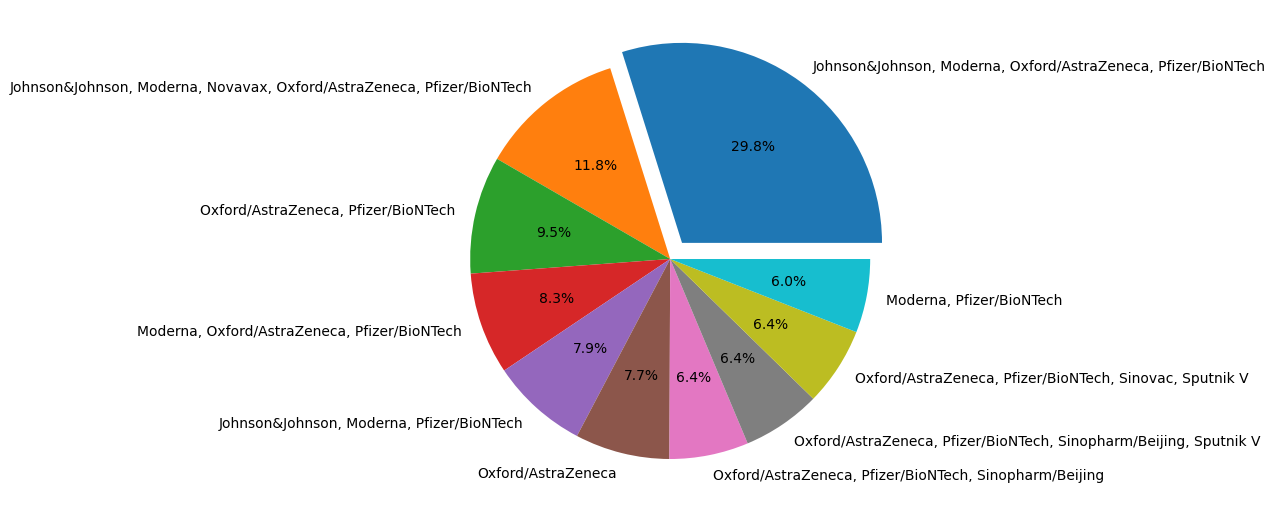

In [196]:
# Построим круговую диаграмму, чтобы отобразить ТОП-10 комбинаций вакцин в мире
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
)

([<matplotlib.patches.Wedge at 0x1c1d1d4f4d0>,
 [Text(0.8331976764897863, 0.7181793869863028, 'Oxford/AstraZeneca'),
  Text(-0.48671381709898587, 0.9864632077502612, 'Pfizer/BioNTech'),
  Text(-1.092173369076159, 0.13098599879694067, 'Johnson&Johnson'),
  Text(-0.8824516474771921, -0.6567184250992123, 'Sinopharm/Beijing'),
  Text(-0.23965002393838042, -1.0735771355735617, 'Moderna'),
  Text(0.40513233654022607, -1.0226767768407852, 'SputnikV'),
  Text(0.8467605811891239, -0.7021371077960895, 'other'),
  Text(1.0724207124032321, -0.2447729879062318, 'Sinovac')],
 [Text(0.45447145990351967, 0.3917342110834378, '22.6%'),
  Text(-0.26548026387217405, 0.5380708405910515, '19.3%'),
  Text(-0.5957309285869958, 0.07144690843469491, '12.3%'),
  Text(-0.4813372622602865, -0.35821005005411577, '11.9%'),
  Text(-0.1307181948754802, -0.58558752849467, '10.8%'),
  Text(0.2209812744764869, -0.5578236964586101, '8.2%'),
  Text(0.46186940792134024, -0.3829838769796851, '7.8%'),
  Text(0.584956752219944

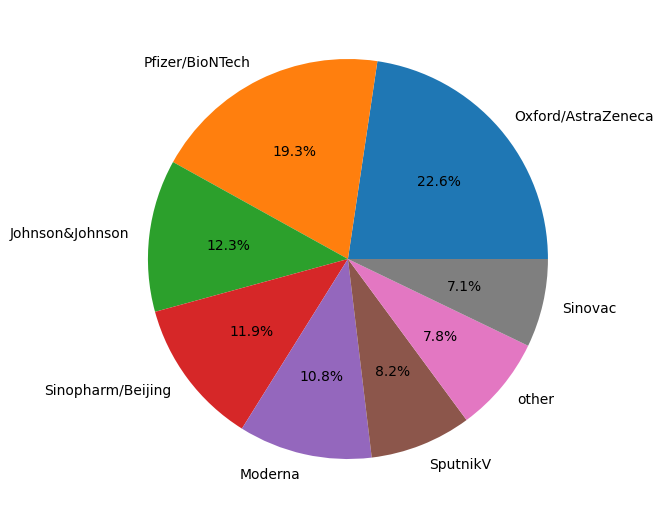

In [197]:
# Правильный пайчарт

#избавляемся от пропусков в столбце с вакцинами
combination_not_nan = covid_df.dropna(subset=['vaccines'])
#группируем по странам и выбираем последнюю комбинацию вакцин в стране
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last() 
#заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) 
#создаём пустой словарь, ключами которого будут вакцины, а значениями — количество стран
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество
#преобразуем словарь в Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
#выделяем ТОП-7 вакцин и добавляем категорию 'other'
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
)

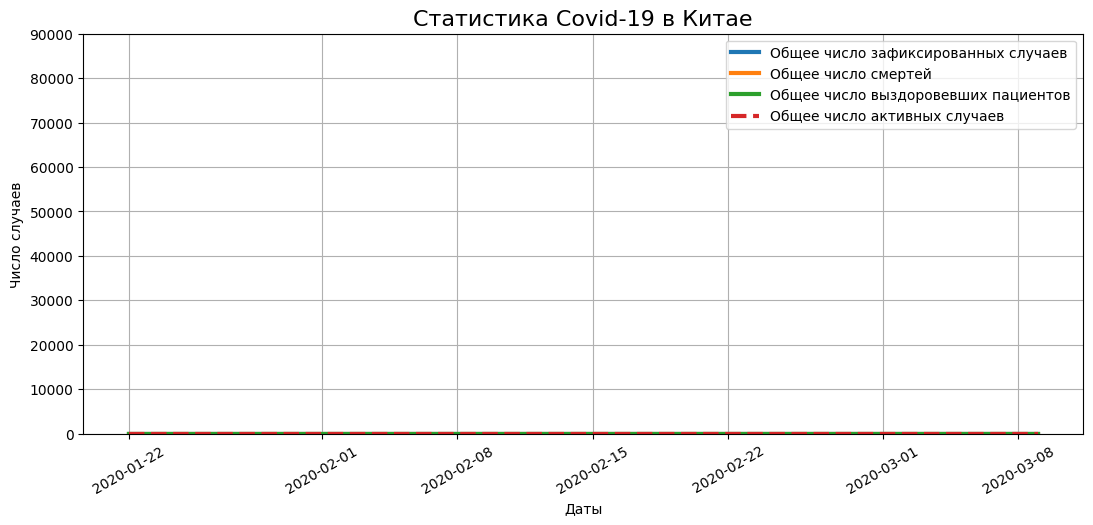

In [205]:
# Изобразим на одном графике, как росла общая заболеваемость, число зафиксированных смертей, выздоровевших пациентов и активных случаев в Китае
china_data = covid_df[covid_df['Country/Region'] == 'China']
china_grouped = china_data.groupby(['ObservationDate'])[['Confirmed', 'Active', 'Deaths', 'Recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['Confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['Deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['Recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['Active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend()

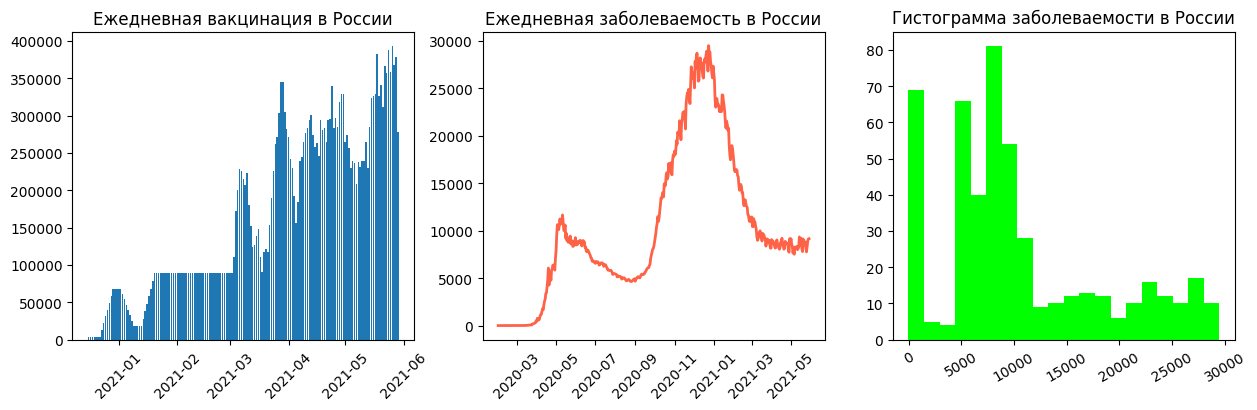

In [209]:
russia_data = covid_df[covid_df["Country/Region"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["ObservationDate"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["ObservationDate"],
    russia_data["Daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["Daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

In [218]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['Country/Region'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['Country/Region', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['Country/Region'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['Daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Active,Daily_confirmed,Daily_deaths,Daily_recovered,country,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


In [213]:
import seaborn as sns

In [219]:
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['Confirmed'] / croped_covid_df['population'] * 100

In [220]:
pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.116606,0.116621,0.116637,0.116683,0.116722,0.116788,0.116854,0.116897,0.116932,0.116983
Canada,1.255346,1.271924,1.289213,1.307814,1.325603,1.342752,1.358701,1.378818,1.395438,1.413813,...,3.599497,3.611526,3.620169,3.628017,3.632706,3.642529,3.648718,3.661252,3.669520,3.675536
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.345962,4.355632,4.363299,4.368845,4.371625,4.374704,4.380047,4.388347,4.395716,4.401106
Russia,NaN,1.837890,1.855752,1.874788,1.894049,1.913074,1.932604,1.952414,1.971828,1.990197,...,3.368999,3.375035,3.380916,3.386963,3.392637,3.397954,3.403604,3.409708,3.415960,3.422232


Text(0.5, 1.0, 'Тепловая карта заболевания')

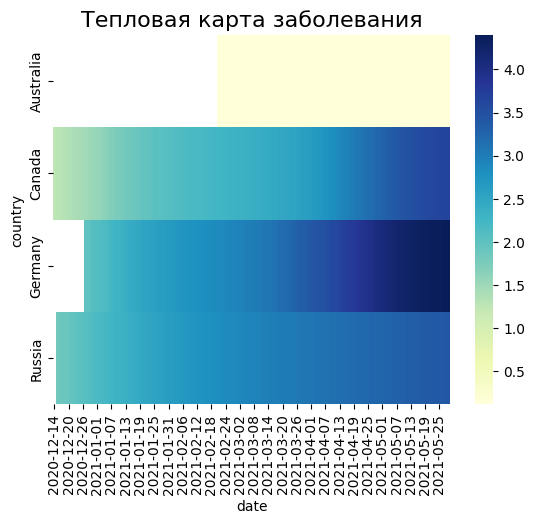

In [221]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта заболевания', fontsize=16)

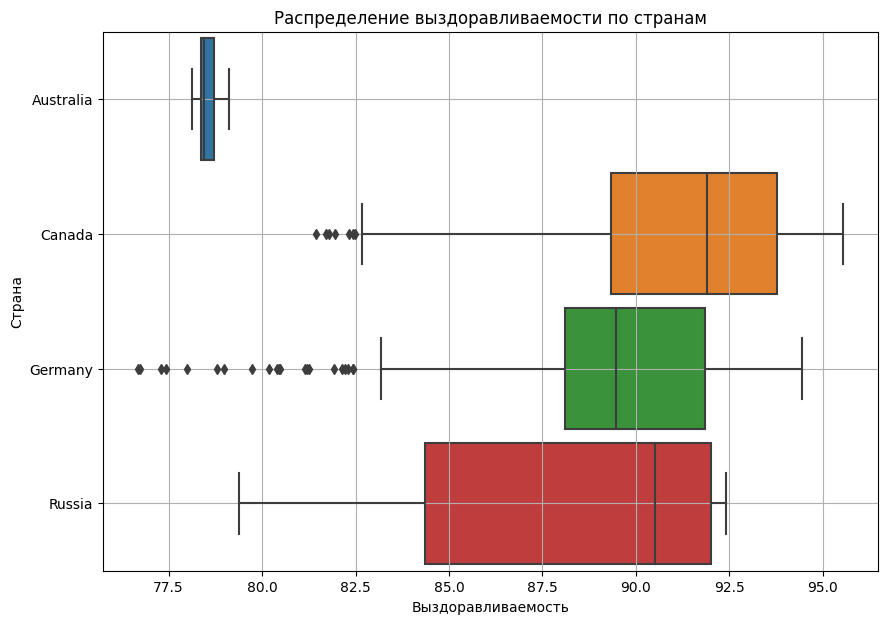

In [222]:
# Постройте коробчатую диаграмму для признака recover_rate
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='recover_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение выздоравливаемости по странам')
boxplot.set_xlabel('Выздоравливаемость')
boxplot.set_ylabel('Страна')
boxplot.grid()

In [223]:
import plotly
import plotly.express as px

In [227]:
#преобразуем даты в строковый формат
choropleth_data = covid_df.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')

#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #DataFrame
    locations="Country/Region", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Confirmed", #от чего зависит цвет
    animation_frame="date", #анимационный бегунок
    range_color=[0, 30e6], #диапазон цвета
    title='Global Spread of COVID-19', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed